# ラビットチャレンジ/深層学習day1/Section1:入力層～中間層
## 100文字以上の要点まとめ

・ 深層学習は、明示的なプログラムの代わりに多数の中間層を持つニューラルネットワークを用いて、入力値から目的とする出力値に変換する数学モデル（関数）を構築する手法。  
・　入力層はニューラルネットワークに何かしらの数字の集まりを$x$に入力する層になる。入力を受け取る部分をノードという。入力の$x$中間層の総入力の$u$に渡す際に、各々の$x$をどの程度の割合で使用するかに応じて重みの$W$を掛け中間層の総入力の$u$に渡す  
$$
u=Wx+b
$$
・　各々の$x$の全体に対して使用の割合を調整するときは、バイアスの$b$を加える。関数で表現するならば重みの$W$は関数の傾きの度合いを調整し、バイアスの$b$は関数の切片の度合いを調整させるため、関数は平行移動する。  
・入力、重みは、ベクトルや行列で表現して計算することができる。  
・ニューラルネットワークの学習は、重み$W$,バイアス$b$の最適化を行う。  
・中間層が1つの時はニューラルネットワークと呼ばれるが、中間層が2層以上になるとディープニューラルネットワークになる。  

## 実装演習

## 順伝播（単層・複数ユニット）

In [1]:
# ステップ関数
import numpy as np

def step_function(x):
    return np.where( x > 0, 1, 0)

W = np.array([
    [0.1, 0.2, 0.3], 
    [0.2, 0.3, 0.4], 
    [0.3, 0.4, 0.5],
    [0.4, 0.5, 0.6]
])

print("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print("入力", x)

#  総入力
u = np.dot(x, W) + b
print("総入力", u)

# 中間層出力
z = step_function(u)
print("中間層出力", z)


重み [[0.1 0.2 0.3]
 [0.2 0.3 0.4]
 [0.3 0.4 0.5]
 [0.4 0.5 0.6]]
バイアス [0.1 0.2 0.3]
入力 [ 1.  5.  2. -1.]
総入力 [1.4 2.2 3. ]
中間層出力 [1 1 1]


In [2]:
# relu関数
def relu(x):
    return np.maximum(0, x)

W = np.array([
    [0.1, 0.2, 0.3], 
    [0.2, 0.3, 0.4], 
    [0.3, 0.4, 0.5],
    [0.4, 0.5, 0.6]
])

print("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print("入力", x)

#  総入力
u = np.dot(x, W) + b
print("総入力", u)

# 中間層出力
z = relu(u)
print("中間層出力", z)

重み [[0.1 0.2 0.3]
 [0.2 0.3 0.4]
 [0.3 0.4 0.5]
 [0.4 0.5 0.6]]
バイアス [0.1 0.2 0.3]
入力 [ 1.  5.  2. -1.]
総入力 [1.4 2.2 3. ]
中間層出力 [1.4 2.2 3. ]


In [3]:
# シグモイド関数
def sigmoid(x):
    return 1/(1 + np.exp(-x))

W = np.array([
    [0.1, 0.2, 0.3], 
    [0.2, 0.3, 0.4], 
    [0.3, 0.4, 0.5],
    [0.4, 0.5, 0.6]
])

print("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print("入力", x)

#  総入力
u = np.dot(x, W) + b
print("総入力", u)

# 中間層出力
z = sigmoid(u)
print("中間層出力", z)

重み [[0.1 0.2 0.3]
 [0.2 0.3 0.4]
 [0.3 0.4 0.5]
 [0.4 0.5 0.6]]
バイアス [0.1 0.2 0.3]
入力 [ 1.  5.  2. -1.]
総入力 [1.4 2.2 3. ]
中間層出力 [0.80218389 0.90024951 0.95257413]


## 確認テスト

この図式に動物分類の実例を入れてみよう。
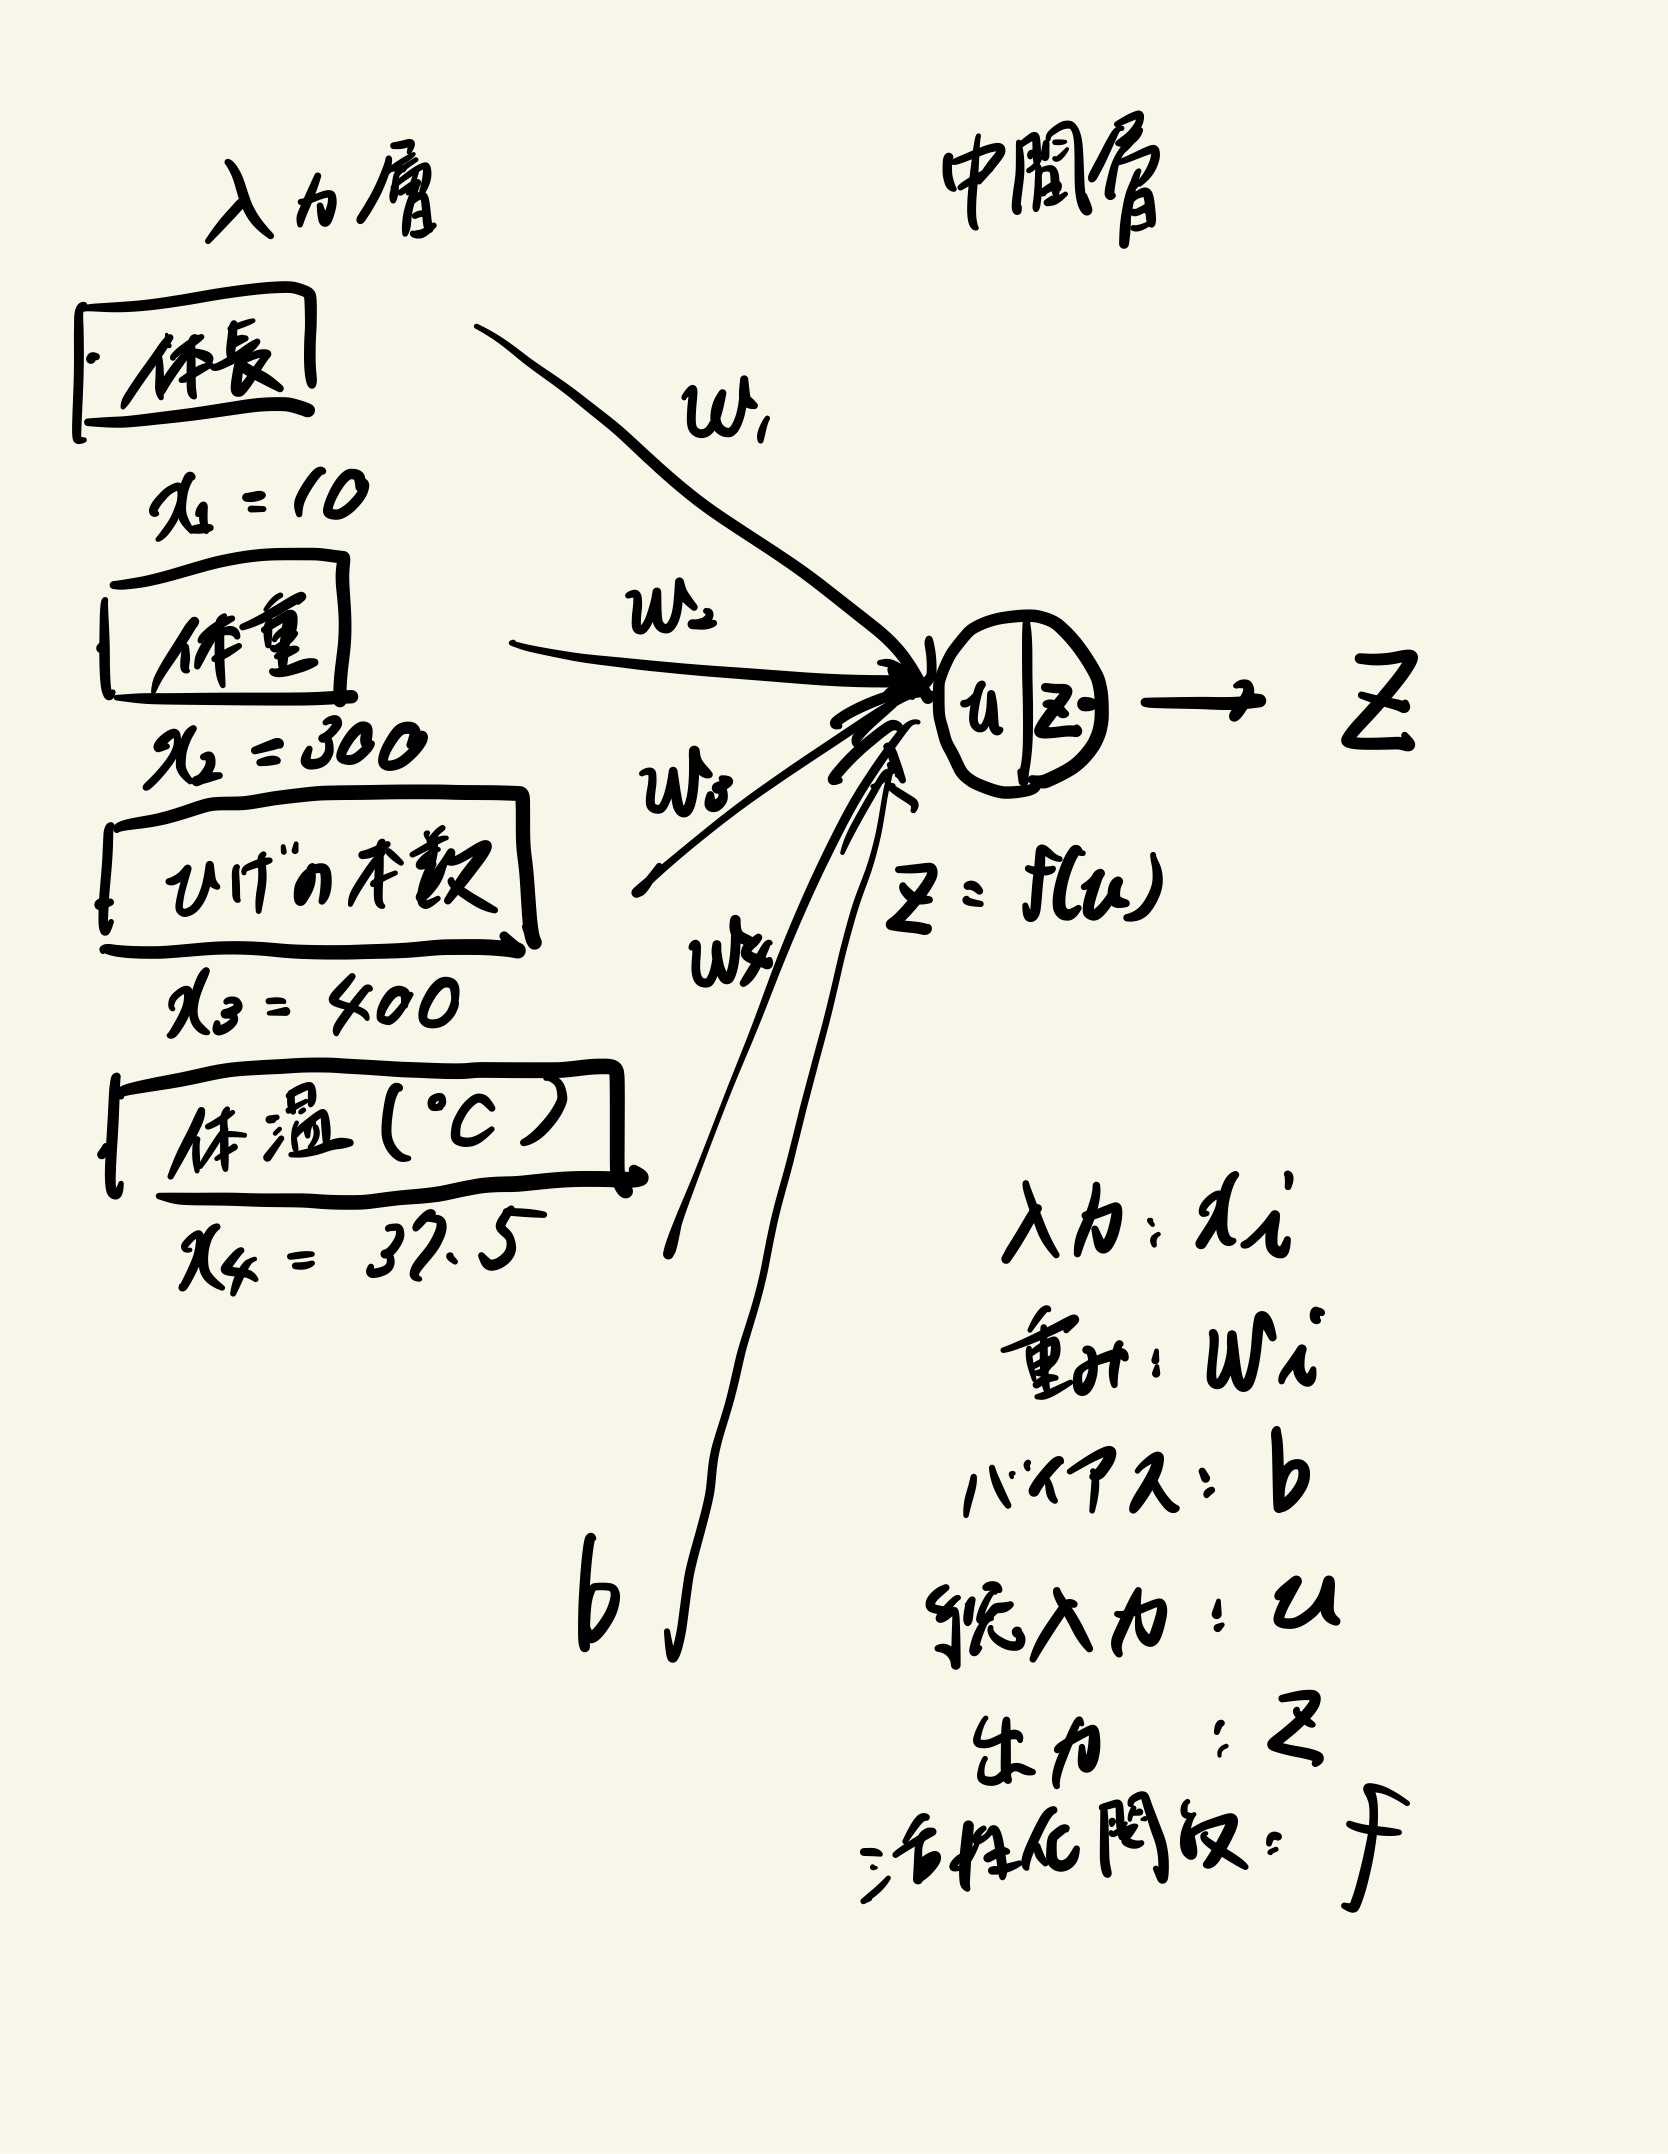

##  確認テスト
・以下の数式をpythonで書け。  
 
$u = w_1x_1+w_2x_2+w_3x_3+x_4+b = Wx+b$  

```
u = np.dot(x,W) + b
```

##  確認テスト

・3層・複数ユニット  
1-1のファイルから中間層の出力を定義しているソースを抜き出せ。

・1層の総出力
```
z1 = functions.relu(u1)
```
・2層の総出力
```
z2 = functions.relu(u2)
```

# ラビットチャレンジ/深層学習day1/Section2:活性化関数
## 100文字以上の要点まとめ

・活性化関数とはニューラルネットワークにおいて、次の層への出力の大きさを決める非線形の関数のこと。  
・入力を重みとバイアスで変換したものに対して、次の層への信号のオンオフや強弱を決定する働きを持つ。  
・活性化関数の種類として、中間層で利用されるものと出力層で利用されるものがあり様々な種類がある。  
・中間層ではステップ関数、シグモイド関数、tanh関数、Relu関数などが使われ、出力層では恒等関数やソフトマックス関数などが使われる。  
・ステップ関数：閾値を超えたら発火する。出力は1か0になる。線形分離可能なものしか学習できない。  
・シグモイド関数：大きな値では出力の変化が微小であるため、勾配消失問題を引き起こすことがある。  
・tanh関数：あらゆる入力値を-1.0～1.0の範囲の数値に変換して出力する関数である。シグモイド関数の拡張バージョン。  
・ReLU関数：勾配消失問題の回避とスパース化の効果がある。  
・恒等関数：入力値を、全く同じ数値に変換して（＝そのまま）出力する関数である。  
・Softmax関数：複数の出力値の合計が1.0（＝100％）になるように変換して出力する関数である。各出力値の範囲は0.0～1.0となる。  

## 実装演習
## 活性化関数(ステップ関数、シグモイド関数、tanh関数、Relu関数)
主に中間層で用いる活性化関数

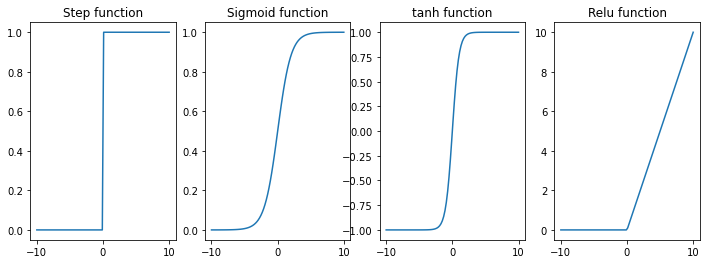

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

# ステップ関数
def step_function(x):
    return np.where( x > 0, 1, 0) 

# シグモイド関数
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# tanh関数
def tanh(x):
    y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    return y

# ReLU関数
def relu(x):
    return np.maximum(0, x)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(141)
ax1.plot(x, step_function(x))
ax1.set_title("Step function")
ax2 = fig.add_subplot(142)
ax2.plot(x, sigmoid(x))
ax2.set_title("Sigmoid function")
ax3 = fig.add_subplot(143)
ax3.plot(x, tanh(x))
ax3.set_title("tanh function")
ax4 = fig.add_subplot(144)
ax4.plot(x, relu(x))
ax4.set_title("Relu function")
plt.show()

## 確認（復習）テスト  
線形と非線形の違いを図にかいて簡易に説明せよ。  

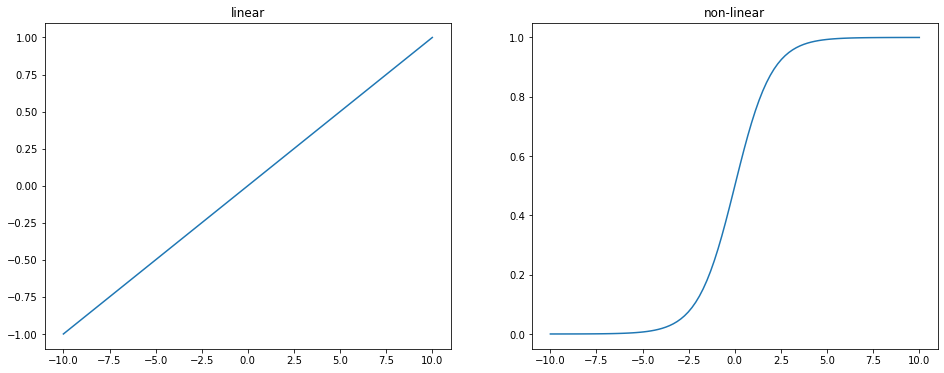

In [5]:
x = np.linspace(-10, 10, 100)
l = 0.1*x
nl = 1 / (1 + np.exp(-x))

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax1.plot(x, l)
ax1.set_title("linear")
ax2 = fig.add_subplot(122)
ax2.plot(x, nl)
ax2.set_title("non-linear")
plt.show()

線形な関数は加法性$f(x+y)=f(x)+f(y)$、斉次性$f(kx)=k・f(x)$を満たすが、非線形は満たさない。

## 確認テスト

配布されたソースコードより該当する箇所$z=f(u)$を抜き出せ。  

```
z = sigmoid(u)

```

# ラビットチャレンジ/深層学習day1/Section3:出力層
## 100文字以上の要点まとめ

・出力層の活性化関数は、分類問題と回帰問題のどちらを用いるかで変更する必要がある。それに合わせてどの誤差関数を使用するかも決まってくる。   ・一般的に回帰問題では恒等関数を、分類問題ではシグモイド関数またはソフトマックス関数を使う。  
・活性化関数によって変換された値は適切な誤差関数(、回帰問題なら平均二乗誤差、分類問題なら交差エントロピー誤差など)に渡され、正解データとの誤差が算出される。  
・ニューラルネットワークでは、この誤差が小さくなるように重みとバイアスが調整される。   
・出力層のニューロンの数は、解くべき問題に応じて、適宣決める必要がある。例えば画像を0から9のどれかを予測するような10クラス分類問題では試出力層のニューロンは10個に設定する。

## 実装演習
出力層・誤差関数は回帰問題は恒等関数・平均二乗誤差、分類問題はソフトマックス関数・クロスエントロピー誤差を使って実装しました。

In [6]:
# 順伝播（3層・複数ユニット）
def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    print("shape: " + str(vec.shape))
    print("")

def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = sigmoid(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = sigmoid(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力（恒等関数）
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("中間層出力2", z2)
    print_vec("出力",y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]
shape: (2,)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]
shape: (2, 3)

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]
shape: (3, 2)

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]
shape: (2, 2)

*** バイアス1 ***
[0.1 0.2 0.3]
shape: (3,)

*** バイアス2 ***
[0.1 0.2]
shape: (2,)

*** バイアス3 ***
[1 2]
shape: (2,)

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]
shape: (3,)

*** 中間層出力1 ***
[0.64565631 0.78583498 0.88079708]
shape: (3,)

*** 総入力2 ***
[0.58597175 1.37965826]
shape: (2,)

*** 中間層出力2 ***
[0.64244035 0.79893611]
shape: (2,)

*** 出力 ***
[1.22403126 2.51230655]
shape: (2,)

出力合計: 3.7363378040587567


In [7]:
# 多クラス分類
# 2-3-4ネットワーク
 # ソフトマックス関数
def softmax(x):
    if x.ndim == 2:
       x = x.T
       x = x - np.max(x, axis=0)
       y = np.exp(x) / np.sum(np.exp(x), axis=0)
       return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

# クロスエントロピー
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size


# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

   
    input_layer_size  = 3
    hidden_layer_size = 5
    output_layer_size = 4
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size)
    network['W2'] = np.random.rand(hidden_layer_size,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size)
    network['b2'] =  np.random.rand(output_layer_size)

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network


# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値（ソフトマックス関数）
    y = softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
x = np.array([1., 2., 3.])

# 目標出力
d = np.array([0, 0, 0, 1])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("クロスエントロピー誤差",  loss)



##### ネットワークの初期化 #####
*** 重み1 ***
[[0.83639783 0.68965013 0.28260388 0.50590051 0.73901289]
 [0.9262588  0.9154571  0.28321084 0.88123207 0.99548116]
 [0.15533853 0.04490717 0.67195494 0.3762208  0.98155912]]
shape: (3, 5)

*** 重み2 ***
[[0.31397593 0.54288653 0.13446554 0.07545776]
 [0.19353691 0.73796938 0.37581796 0.27881042]
 [0.88986588 0.08946919 0.81316073 0.89051495]
 [0.08913352 0.18116264 0.69258204 0.81733086]
 [0.65833815 0.82501012 0.06235955 0.42978203]]
shape: (5, 4)

*** バイアス1 ***
[0.36322847 0.70977016 0.47911835 0.16654183 0.58841721]
shape: (5,)

*** バイアス2 ***
[0.14494339 0.03095111 0.24491189 0.9837436 ]
shape: (4,)

##### 順伝播開始 #####
*** 総入力1 ***
[3.51815948 3.36505602 3.34400874 3.5635689  6.26306979]
shape: (5,)

*** 中間層出力1 ***
[3.51815948 3.36505602 3.34400874 3.5635689  6.26306979]
shape: (5,)

*** 総入力2 ***
[ 9.31739382 10.53608806  7.56047419 10.76968821]
shape: (4,)

*** 出力1 ***
[0.11327273 0.38317533 0.01954811 0.48400383]
shape: (4,)

出力合計: 1.0

##### 結果表示 

In [8]:
# 回帰
# 2-3-2ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2
def init_network():
    print("##### ネットワークの初期化 #####")

    input_layer_size  = 3
    hidden_layer_size = 5
    output_layer_size = 4
    
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size)
    network['W2'] = np.random.rand(hidden_layer_size,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size)
    network['b2'] =  np.random.rand(output_layer_size)

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network


# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力（恒等関数）
    y = u2
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
    
    return y, z1

# 入力値
x = np.array([1., 2., 3.])
network =  init_network()
y, z1 = forward(network, x)
# 目標出力
d = np.array([2., 4., 6. ,8.])
# 平均二乗誤差
loss = mean_squared_error(d, y)
## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("平均二乗誤差",  loss)


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.76314382 0.8649718  0.53052394 0.51633395 0.37025494]
 [0.01926325 0.04549642 0.33897644 0.53344521 0.20431678]
 [0.5384712  0.89367284 0.82133957 0.18508901 0.76405002]]
shape: (3, 5)

*** 重み2 ***
[[0.49108663 0.70409072 0.07411252 0.31315701]
 [0.58498457 0.58607831 0.93512916 0.3457221 ]
 [0.3522729  0.19346095 0.02662004 0.89560012]
 [0.31850921 0.35665086 0.84881443 0.32155541]
 [0.40039283 0.67675018 0.85188835 0.57939339]]
shape: (5, 4)

*** バイアス1 ***
[0.4314326  0.0182595  0.31933724 0.08162922 0.16053982]
shape: (5,)

*** バイアス2 ***
[0.63281533 0.63389158 0.89161372 0.46415631]
shape: (4,)

##### 順伝播開始 #####
*** 総入力1 ***
[2.84851652 3.65524266 3.99183276 2.22012061 3.23157838]
shape: (5,)

*** 中間層出力1 ***
[2.84851652 3.65524266 3.99183276 2.22012061 3.23157838]
shape: (5,)

*** 総入力2 ***
[7.57718845 8.53280701 9.26452562 8.78122025]
shape: (4,)

*** 出力1 ***
[7.57718845 8.53280701 9.26452562 8.78122025]
shape: (4,)

出力合計: 34.15574132874637

#

## 確認テスト

2乗和誤差（平均二乗誤差）

・⑴なぜ、引き算でなく二乗するか述べよ  

・⑵下式の$\displaystyle\frac{1}{2}$はどういう意味を持つか述べよ 
$$
E = \frac{1}{2}\sum_{k}(y_k-t_k)^2
$$

解  
⑴　誤差として正負両方の値をとってしまうと、全体の誤差を正しく表すのに都合が悪い。そのため、2乗することで誤差を正の値にして、値が大きいほど誤差が大きくなるように設計する。  
⑵実際の学習時に行う誤差逆伝搬の計算で、誤差関数を微分をする際の計算を簡単にするために$\displaystyle\frac{1}{2}$をつける。微分した時の2を消去するため。

## 確認テスト
ソフトマックス関数①~③の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。

$$
f(i,u) = \dfrac{e^{u_i}}{\displaystyle{\Sigma_{k=1}^n} e^{u_k}}
$$

```
# ①ソフトマックス関数を宣言
def softmax(x):
# xの次元数が２であるならば
    if x.ndim == 2:
　　　#  xを転置（正規化したい要素がある次元をshape[0]に配置）
        x = x.T
     # オーバーフロー対策
        x = x -np.max(x, axis=0)
     # ②③ソフトマックス関数を適用(shape[0]方向に)
        y = np.exp(x) /np.sum(np.exp(x), axis=0)
     #　転置して出力した結果をもとに戻す   
        return y.T
    #オーバーフロー対策
    x = x -np.max(x) 
    #ソフトマックス関数を適用して出力
    return np.exp(x) / np.sum(np.exp(x))
```

## 確認テスト
以下の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。
$$
E_n(W) = -\displaystyle{\Sigma_{i=1}^l d_i \log y_i}
$$

```
# ①交差クロスエントロピー誤差の宣言
def cross_entropy_error(d, y):
# yの次元数が１であるならば
    if y.ndim== 1:
# バッチの枚数で正規化
       d= d.reshape(1, d.size)
# 出力の要素を１つの次元でまとめる
       y= y.reshape(1, y.size)# 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
# 教師データと出力の要素の数が等しい時、
    if d.size== y.size:
# 教師データの要素の最大値を取得する
       d= d.argmax(axis=1)
# 出力数を取得
       batch_size= y.shape[0]
#　②交差エントロピー誤差を計算して出力
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size
    
```

# ラビットチャレンジ 深層学習day1/Section4:勾配降下法
## 100文字以上の要点まとめ
・勾配降下法：ニューラルネットワークを学習し、パラメータを最適化する手法。  

$$
W^{(t+1)} = W^{t} - \varepsilon \nabla E
$$

$$\nabla E = \frac{\partial E}{\partial W} = \bigl[\frac{\partial E}{\partial w_1} \cdots \frac{\partial E}{\partial w_M} \bigl]$$

$\varepsilon$:学習率  

・ある重みのときの誤差があり、重みを調整して、誤差が最小になるような重みやバイアスをみつける。  
・学習率が大きすぎると、最小値にたどり着かずに収束せず、発散してしまう。逆に小さすぎると、収束するまでに時間がかかる。また、局所最小から抜け出すことができない。  
・代表的な最適化アルゴリズムとして、Adam、Momentum、Adagrad等がある。非常によく使用されるのはAdamである。  
・確率勾配降下法（SGD）は、ランダムに抽出したサンプルの誤差を用いる。  
・ミニバッチ勾配降下法は、ランダムに分割したデータの集まり（ミニバッチ）に属するサンプルの平均誤差を用いる。SGDのメリットを損なわず、計算資源を有効活用できる。  

## 実装演習

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

##### 結果表示 #####


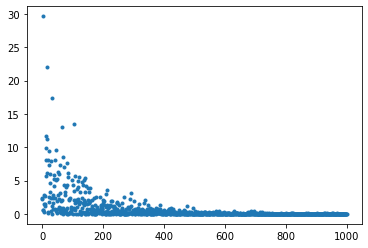

In [10]:
# サンプルとする関数
#yの値を予想するAI
# ReLU関数
def relu(x):
    return np.maximum(0, x)

# 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2


# 平均二乗誤差の導関数
def d_mean_squared_error(d, y):
    if type(d) == np.ndarray:
        batch_size = d.shape[0]
        dx = (y - d)/batch_size
    else:
        dx = y - d
    return dx

# シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# シグモイド関数（ロジスティック関数）の導関数
def d_sigmoid(x):
    dx = (1.0 - sigmoid(x)) * sigmoid(x)
    return dx

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.01

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

## 確認テスト
オンライン学習とは何か2行でまとめよ。

### オンライン学習とは、学習データが入ってくる度にその都度パラメータ（重みやバイアス）を更新しながら、学習を進めていく手法である。逐次取得したデータを1つずつ使っていく特徴がある。

# 確認テスト

この数式の意味を図に書いて説明せよ。

$$
W^{(t+1)} = W^{t} - \varepsilon \nabla E
$$

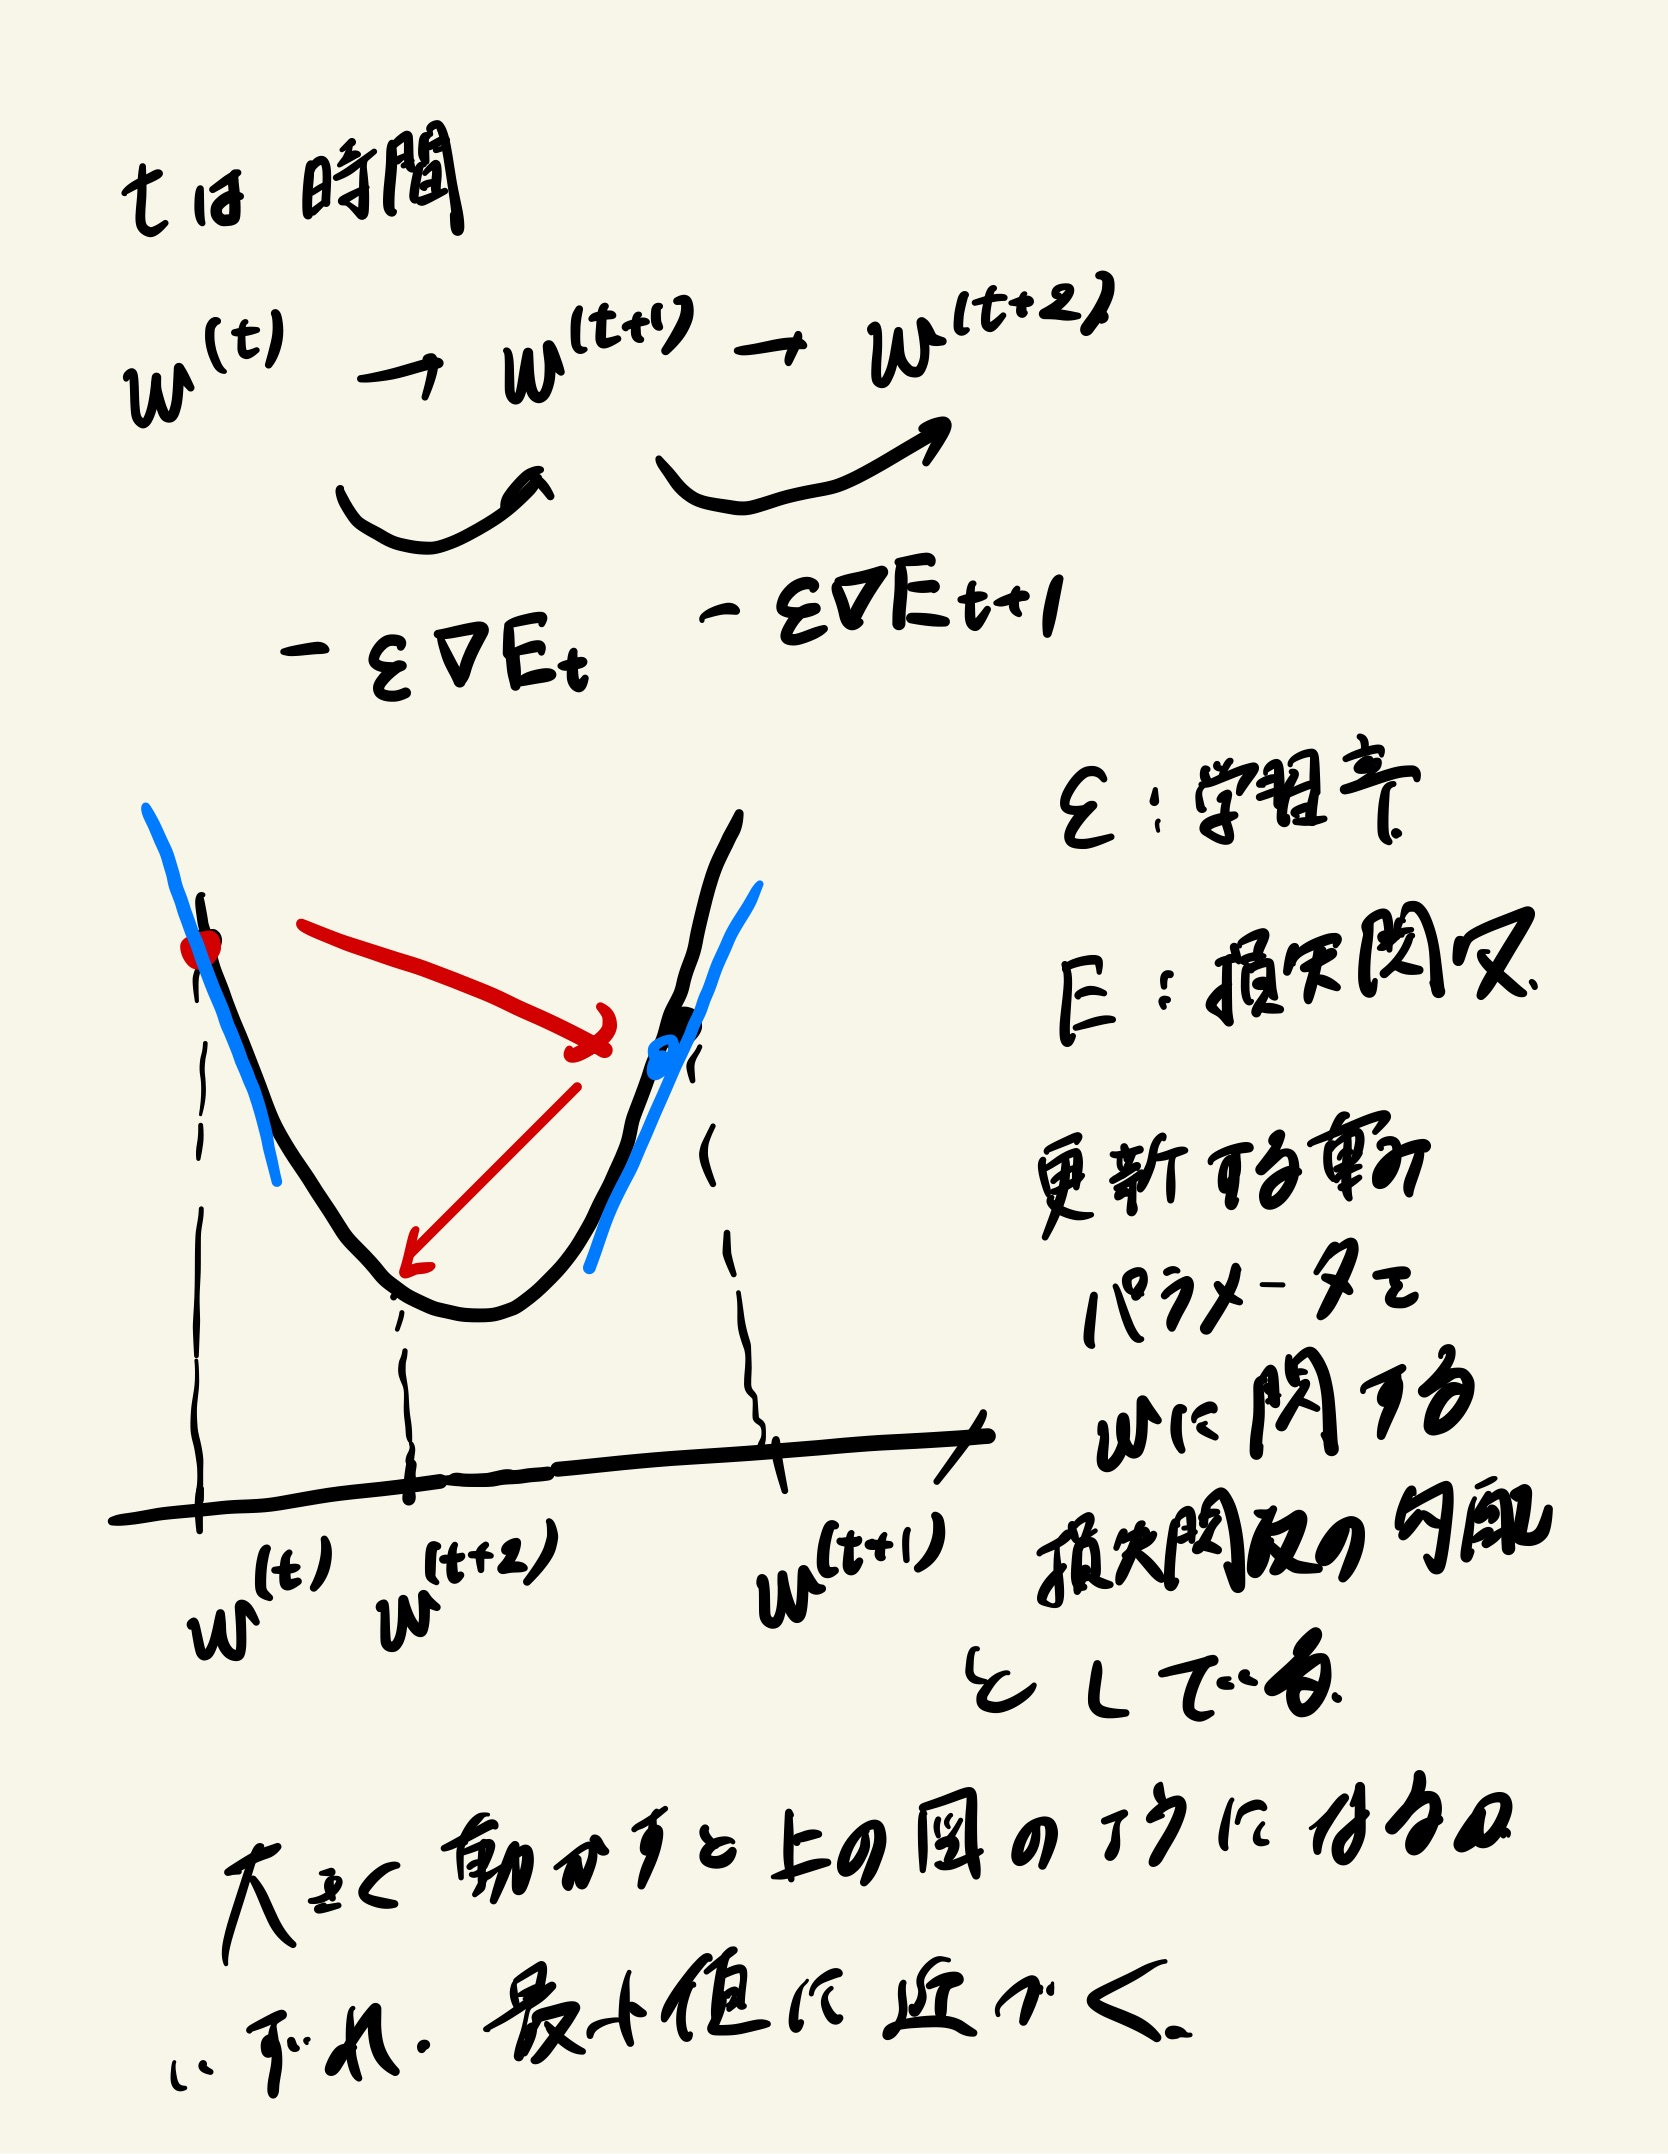

# ラビットチャレンジ 深層学習day1/Section5:誤差逆伝播法
## 100文字以上の要点まとめ
・勾配の計算方法として、プログラムで微小な数値を生成し疑似的に微分を計算する一般的な手法は数値微分であるが、計算量が膨大で計算機への負荷が大きい。各パラメータそれぞれについて計算するために、順伝播の計算を繰り返す必要がある。  
・誤差逆伝播法  
　算出された誤差を出力層側から順に微分し、前の層へと伝播させる。微分を逆算することで、不要な再帰的計算を避けて微分を行うことができる。  （連鎖律・チェインルール）最小限の計算で各パラメータでの微分値を解析的に計算できる。  

# 実装演習

In [13]:
# ReLU関数の導関数
def d_relu(x):
    return np.where( x > 0, 1, 0)

# シグモイドとクロスエントロピーの複合導関数
def d_sigmoid_with_loss(d, y):
    return y - d

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])

    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])

    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    
    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    u1 = np.dot(x, W1) + b1
    z1 = relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
    delta2 = d_sigmoid_with_loss(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
        
    print_vec("偏微分_dE/du2", delta2)
    print_vec("偏微分_dE/du2", delta1)

    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad
    
# 訓練データ
x = np.array([[1.0, 5.0]])
# 目標出力
d = np.array([[0, 1]])
#  学習率
learning_rate = 0.01
network =  init_network()
y, z1 = forward(network, x)

# 誤差
loss = cross_entropy_error(d, y)

grad = backward(x, d, z1, y)
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]

print("##### 結果表示 #####")    


print("##### 更新後パラメータ #####") 
print_vec("重み1", network['W1'])
print_vec("重み2", network['W2'])
print_vec("バイアス1", network['b1'])
print_vec("バイアス2", network['b2'])


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

##### 順伝播開始 #####
*** 総入力1 ***
[[1.2 2.5 3.8]]

*** 中間層出力1 ***
[[1.2 2.5 3.8]]

*** 総入力2 ***
[[1.86 4.21]]

*** 出力1 ***
[[0.08706577 0.91293423]]

出力合計: 0.9999999999999999

##### 誤差逆伝播開始 #####
*** 偏微分_dE/du2 ***
[[ 0.08706577 -0.08706577]]

*** 偏微分_dE/du2 ***
[[-0.02611973 -0.02611973 -0.02611973]]

*** 偏微分_重み1 ***
[[-0.02611973 -0.02611973 -0.02611973]
 [-0.13059866 -0.13059866 -0.13059866]]

*** 偏微分_重み2 ***
[[ 0.10447893 -0.10447893]
 [ 0.21766443 -0.21766443]
 [ 0.33084994 -0.33084994]]

*** 偏微分_バイアス1 ***
[-0.02611973 -0.02611973 -0.02611973]

*** 偏微分_バイアス2 ***
[ 0.08706577 -0.08706577]

##### 結果表示 #####
##### 更新後パラメータ #####
*** 重み1 ***
[[0.1002612  0.3002612  0.5002612 ]
 [0.20130599 0.40130599 0.60130599]]

*** 重み2 ***
[[0.09895521 0.40104479]
 [0.19782336 0.50217664]
 [0.2966915  0.6033085 ]]

*** バイアス1 ***
[0.1002

# 確認テスト
誤差逆伝播法では不要な再帰的処理を避ける事が出来る。既に行った計算結果を保持しているソースコードを抽出せよ。

```  
def d_sigmoid_with_loss(d, y):
    return y - d
```
```

    delta2 = d_sigmoid_with_loss(d, y)
```


# 確認テスト 
2つの空欄に該当するソースコードを探せ。

$\displaystyle{\frac{\partial E}{\partial y}}$
```
delta2 = d_mean_squared_error(d, y)
delta2 = d_sigmoid_with_loss(d, y)

```
・一つ目の空欄  
$\displaystyle{\frac{\partial E}{\partial y}}\displaystyle{\frac{\partial y}{\partial u}}$

```
delta1 = np.dot(delta2, W2.T) * d_relu(z1)
delta1 = np.dot(delta2, W2.T) * d_sigmoid(z1)

```
・２つ目の空欄  
$\displaystyle{\frac{\partial E}{\partial y}}\displaystyle{\frac{\partial y}{\partial u}}\displaystyle{\frac{\partial u}{\partial {w_{ji}}^{(2)}}}$

```
grad['W2'] = np.dot(z1.T, delta2)

```
```

y, z1 = forward(network, x)

```